# DoG Scale Space

In this notebook, we shall combine the results of the Smoothing and Edge Detection notebooks to construct the DoG Scale Space Pyramid directly on encrypted images; a central component of the HESIFT algorithm.

In [1]:
from feature_extractors.HESIFT import *
import cv2
# Show the figures / plots inside the notebook
%matplotlib inline

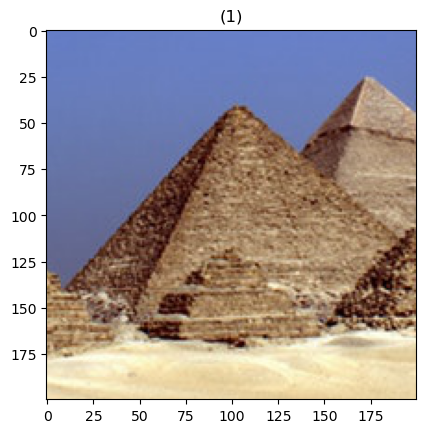

In [2]:
# Preparing the test image
RGB_image = io.imread("images/pyramids.jpeg")
RGB_image = RGB_image[500:700, 200:400]
show_images([RGB_image])

In [3]:
grayscale_image = (rgb2gray(RGB_image) * 255).astype(np.float32)
baseImage = generateBaseImage(grayscale_image, 2, 0).astype(np.int64)
num_octaves = computeNumberOfOctaves(baseImage.shape)
gaussian_kernels = generateGaussianKernels(0.4, 3)
encryptedBaseImage = encryptImage(baseImage)
encryptedGaussianImages = generateEncryptedGaussianImages(encryptedBaseImage, num_octaves, gaussian_kernels)
encryptedDOGImages = generateEncryptedDoGImages(encryptedGaussianImages)

Generating base image...
Generating Gaussian Kernels...
Generating Gaussian images...
Octave 1 Running:
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Octave 1 Done!!!
-----------------------------------------------------------------------
Octave 2 Running:
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Octave 2 Done!!!
-----------------------------------------------------------------------
Octave 3 Running:
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Octave 3 Done!!!
-----------------------------------------------------------------------
Octave 4 Running:
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Octave 4 Done!!!
-----------------------------------------------------------------------
Octave 5 Running:
Convolution Done!
Convolution Done!


In [6]:
len(encryptedDOGImages)

8

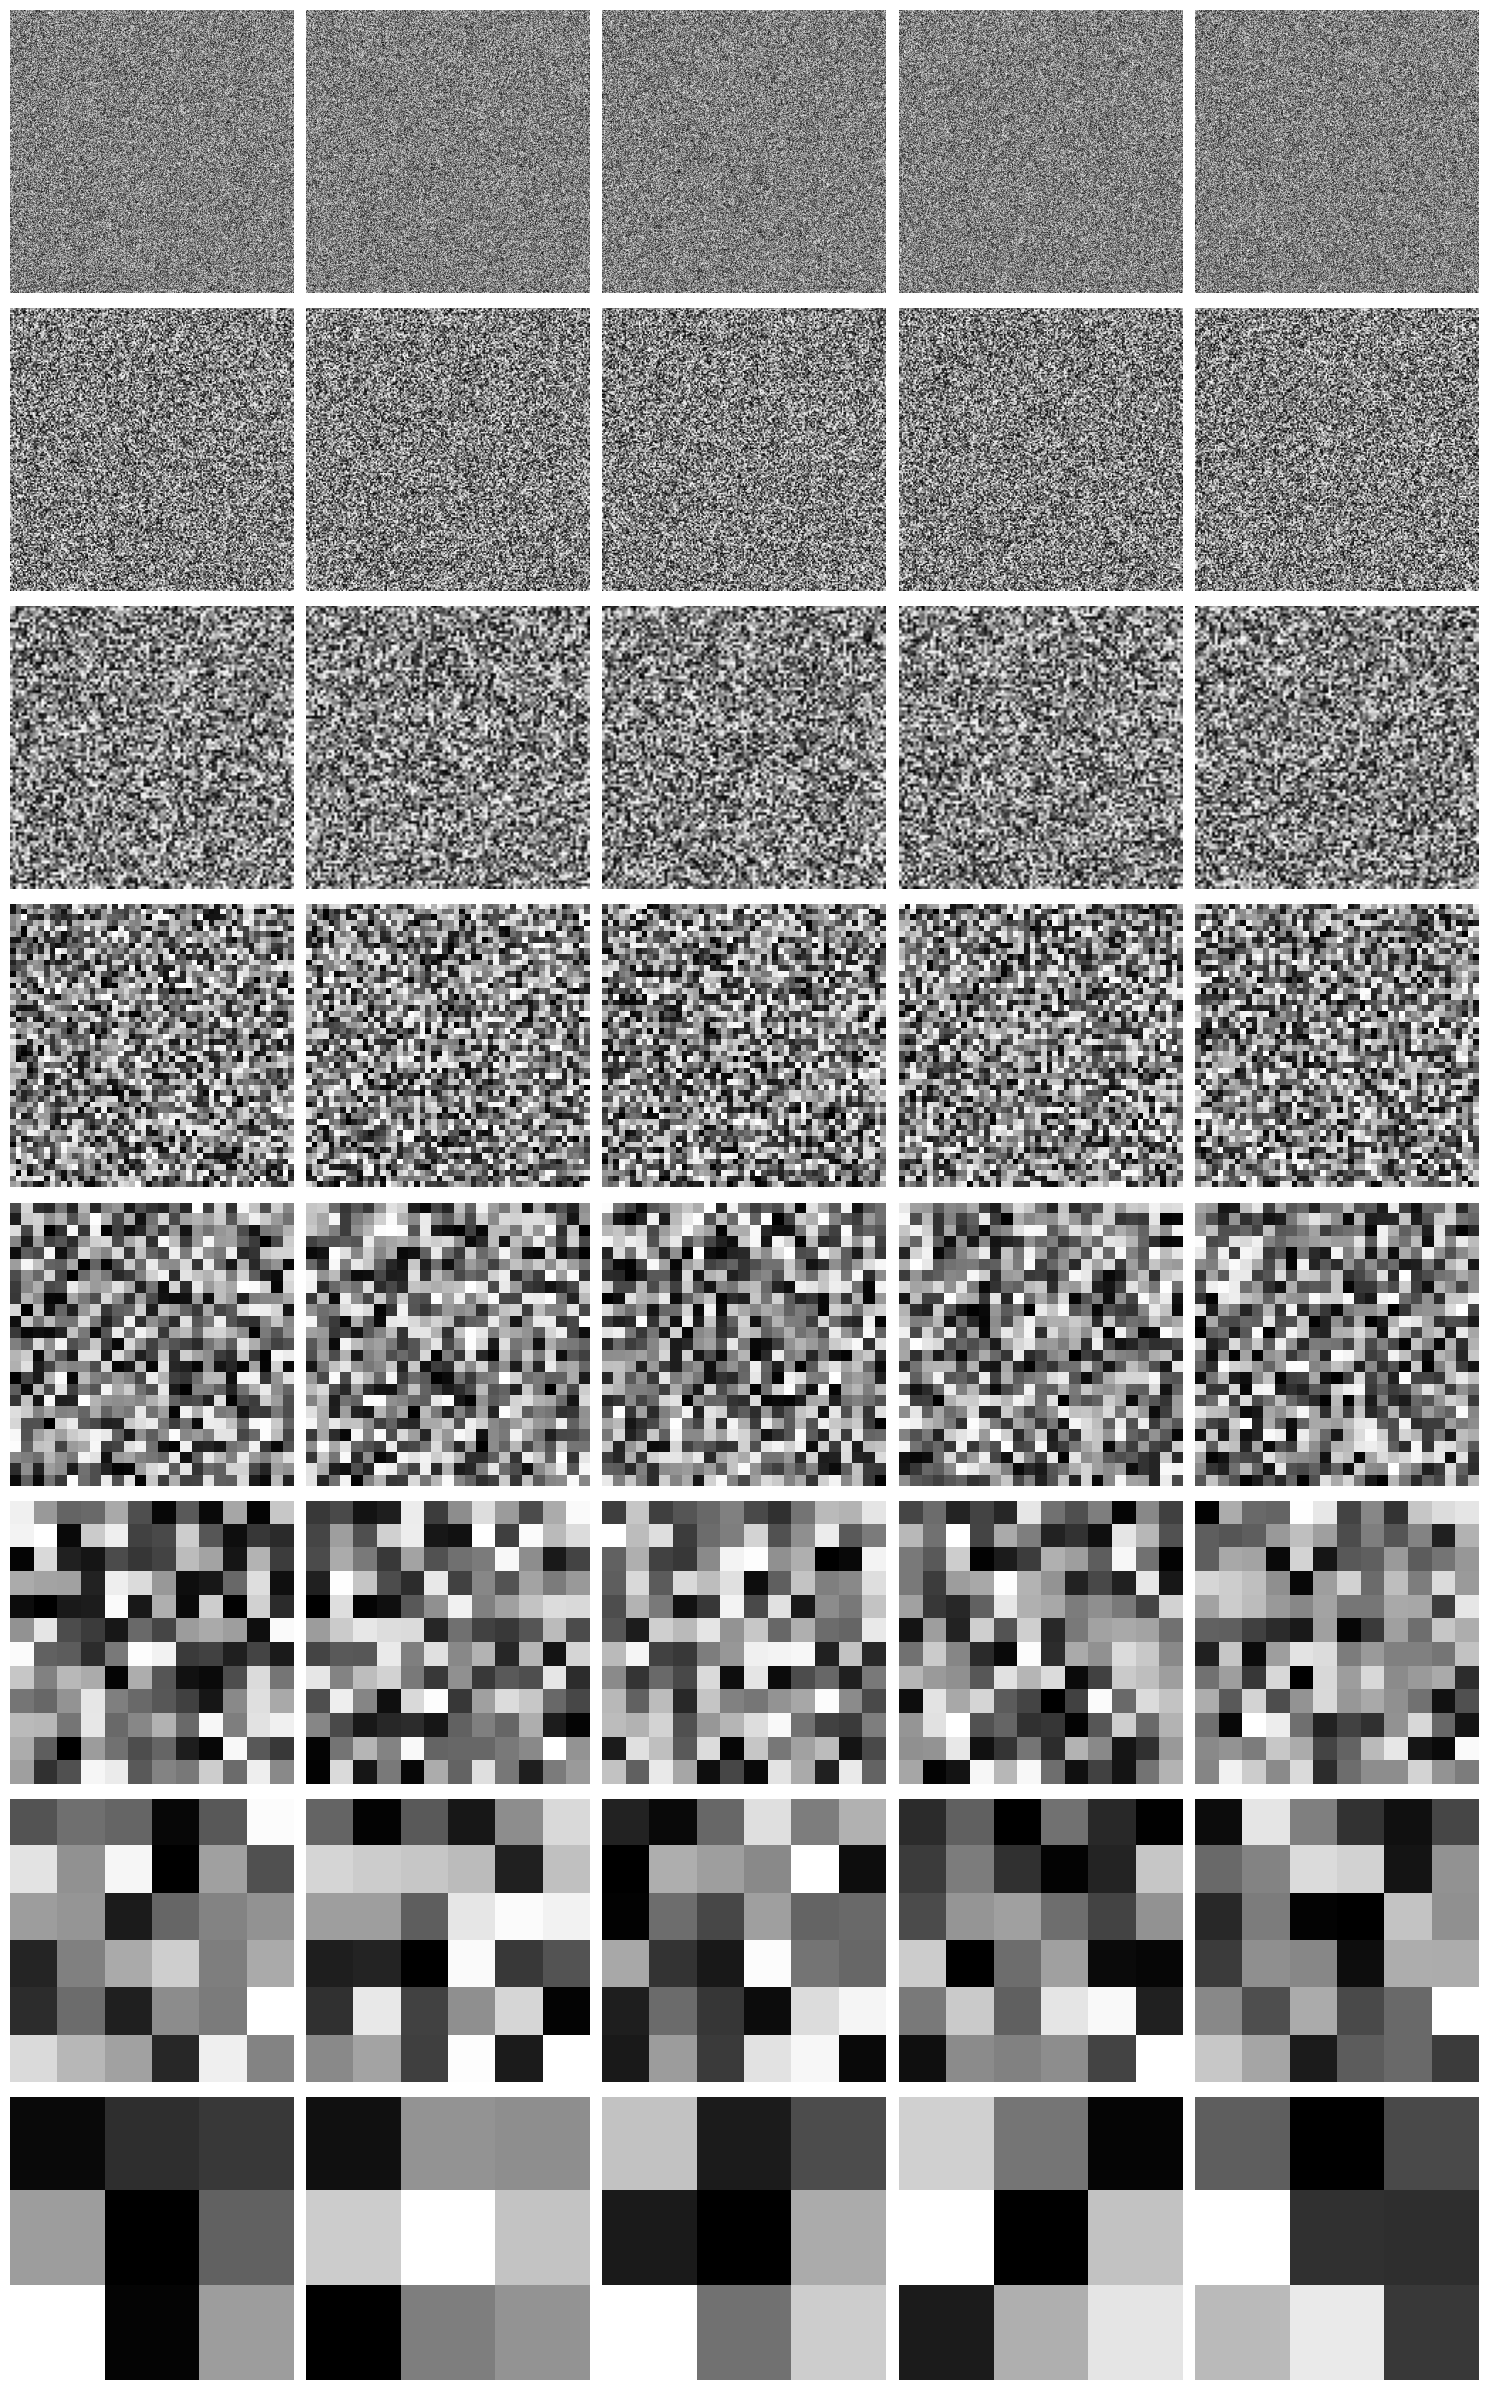

In [9]:
fig, axs = plt.subplots(8, 5, figsize=(15, 24))
# Iterate over each octave and image to display them
for i, octave in enumerate(encryptedDOGImages):
    for j, image in enumerate(octave):
        axs[i, j].imshow(image, cmap='gray')
        axs[i, j].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

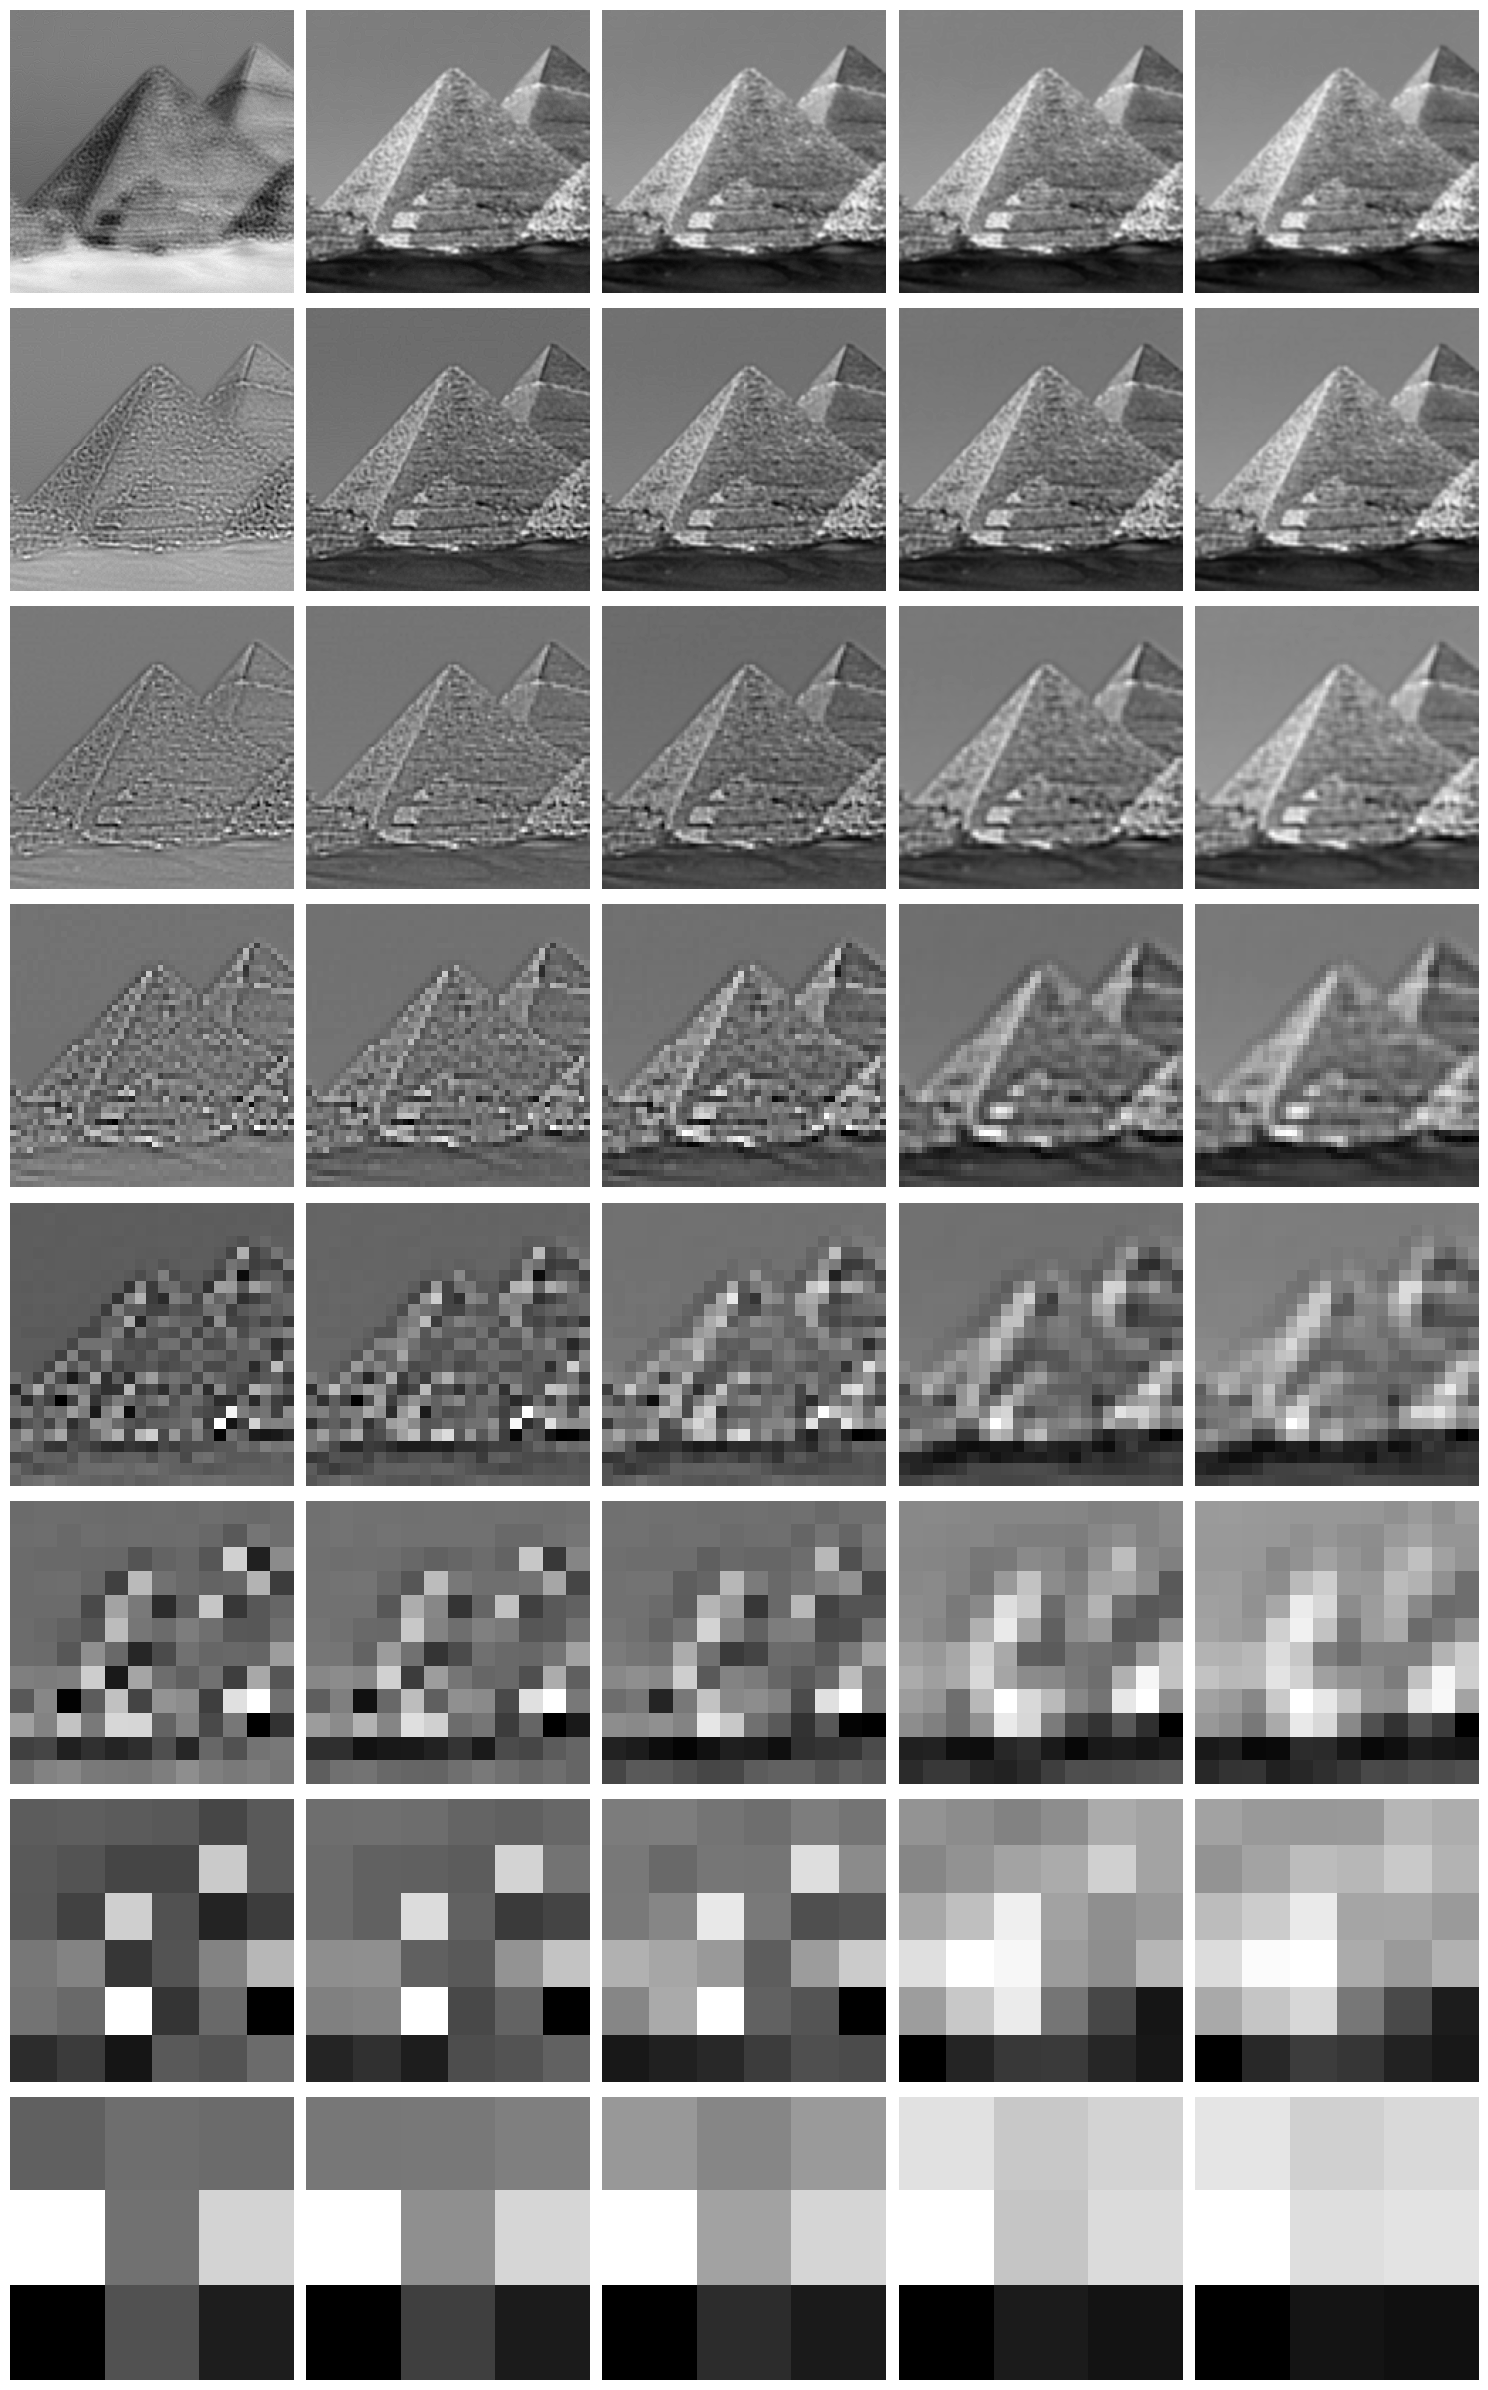

In [10]:
fig, axs = plt.subplots(8, 5, figsize=(15, 24))
# Iterate over each octave and image to display them
for i, octave in enumerate(encryptedDOGImages):
    for j, image in enumerate(octave):
        axs[i, j].imshow(decryptImage(image), cmap='gray')
        axs[i, j].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()